# 0. IMPORTS

## 0.1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 0.2. Datasets

In [2]:
df = pd.read_csv('data/dataframe_for_analysis.csv')

In [4]:
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of rows: 336816
Number of columns: 13


In [10]:
df['date'] = pd.to_datetime(df['date'])

## 0.3. Graph visualization

In [5]:
from IPython.core.display import HTML

def jupyter_settings():
   %matplotlib inline
   %pylab inline
   plt.style.use( 'bmh' )
   plt.rcParams['figure.figsize'] = [18, 8]
   plt.rcParams['font.size'] = 20
   display( HTML( '<style>.container { width:100% !important; }</style>') )
   pd.options.display.max_columns = None
   pd.options.display.max_rows = None
   pd.set_option( 'display.expand_frame_repr', False )
   sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1. DATA ANALYSIS

## 1.1. Descriptive Statistics

In [14]:
num_attributes = df[['price','birth','age']]
cat_attributes = df.select_dtypes(exclude = ['int64', 'float64', 'datetime'])

**Numerical Attributes**

In [16]:
# Central Tendency
ct1 = pd.DataFrame(num_attributes.mean()).round(2)
ct2 = pd.DataFrame(num_attributes.median()).round(2)

# Dispersion
d1 = pd.DataFrame(num_attributes.std()).round(2)
d2 = pd.DataFrame(num_attributes.min()).round(2)
d3 = pd.DataFrame(num_attributes.max()).round(2)
d4 = pd.DataFrame(num_attributes.max() - num_attributes.min()).round(2)

# Shape
s1 = pd.DataFrame(num_attributes.skew()).round(2)
s2 = pd.DataFrame(num_attributes.kurtosis()).round(2)

# Concatenation
df_num = pd.concat([ct1, ct2, d1, d2, d3, d4, s1, s2], axis = 1)
df_num.columns = ['mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']
df_num

,mean,median,std,min,max,range,skew,kurtosis
price,17.21,13.9,17.85,0.62,300.0,299.38,5.48,45.44
birth,1977.82,1980.0,13.52,1929.00,2004.0,75.00,-0.58,0.45
age,42.18,40.0,13.52,16.00,91.0,75.00,0.58,0.45


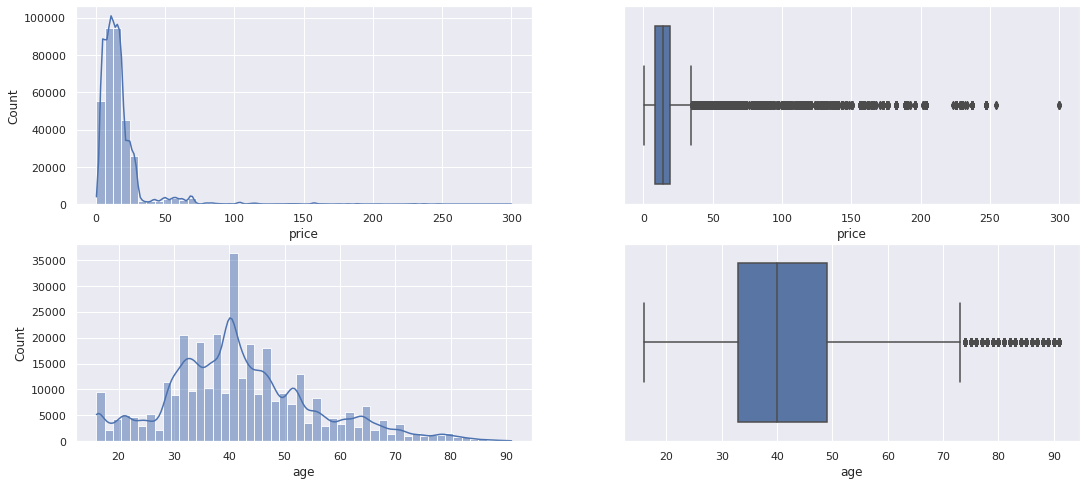

In [182]:
plt.subplot(2, 2, 1)
sns.histplot(df1['price'], bins = 50, kde = True);
plt.subplot(2, 2, 2)
sns.boxplot(data = df1, x = 'price');

plt.subplot(2, 2, 3)
sns.histplot(df1['age'], bins = 50, kde = True);
plt.subplot(2, 2, 4)
sns.boxplot(data = df1, x = 'age');

**Categorical Attributes**

In [157]:
print('Different products: {:,}'.format(df1['id_prod'].value_counts().shape[0]))
print('Different clients: {:,}'.format(df1['client_id'].value_counts().shape[0]))

Different products: 3,265
Different clients: 8,600


In [159]:
print('Available categories: {}'.format(df1['categ'].value_counts().shape[0]))
print('- Category 0: {:,}'.format(df1[df1['categ'] == '0'].value_counts().shape[0]))
print('- Category 1: {:,}'.format(df1[df1['categ'] == '1'].value_counts().shape[0]))
print('- Category 2: {:,}\n'.format(df1[df1['categ'] == '2'].value_counts().shape[0]))

print('Different genders: {}'.format(df1['sex'].value_counts().shape[0]))
print('- Male: {:,}'.format(df1[df1['sex'] == 'm'].value_counts().shape[0]))
print('- Female: {:,}'.format(df1[df1['sex'] == 'f'].value_counts().shape[0]))

Available categories: 3
- Category 0: 209,529
- Category 1: 109,735
- Category 2: 17,552

Different genders: 2
- Male: 169,241
- Female: 167,575


<AxesSubplot:xlabel='period_of_day', ylabel='count'>

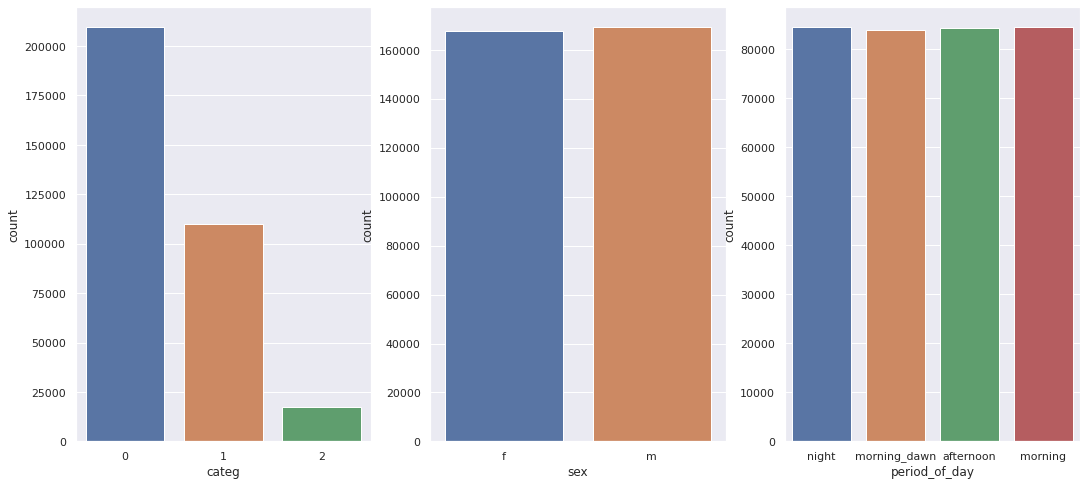

In [33]:
plt.subplot(1, 3, 1)
sns.countplot(data = cat_attributes.sort_values(by = 'categ'), x = 'categ');

plt.subplot(1, 3, 2)
sns.countplot(data = cat_attributes.sort_values(by = 'sex'), x = 'sex');

plt.subplot(1, 3, 3)
sns.countplot(data = cat_attributes, x = 'period_of_day');

## 1.2. Concentration Analysis

In [41]:
df_lorenz = df[['id_prod', 'price']]
df_lorenz = df_lorenz.drop_duplicates()

In [67]:
X = df_lorenz['price'].values

**Lorenz Curve**

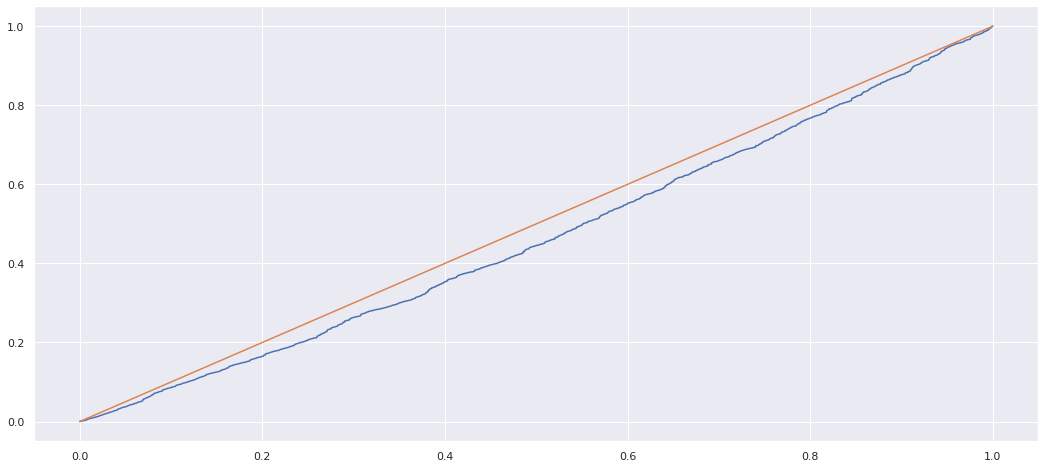

In [71]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)

plt.plot(np.linspace(0.0, 1.0, X_lorenz.size), X_lorenz);
plt.plot([0,1], [0,1]);
plt.show();

**Gini Index**

In [76]:
sorted_list = sorted(X_lorenz)
height, area = 0, 0

for value in sorted_list:
    height += value
    area += height - value / 2.

fair_area = height * len(X_lorenz) / 2.
gini = (fair_area - area) / fair_area
gini

0.35814063233521426

## 1.3. Temporal Series Analysis

In [24]:
# time interval of data
print('First registered date of purchase: {}'.format(df['date'].min()))
print('Last registered date of purchase: {}'.format(df['date'].max()))

First registered date of purchase: 2021-03-01 00:01:07.843138
Last registered date of purchase: 2022-02-28 23:59:58.040472


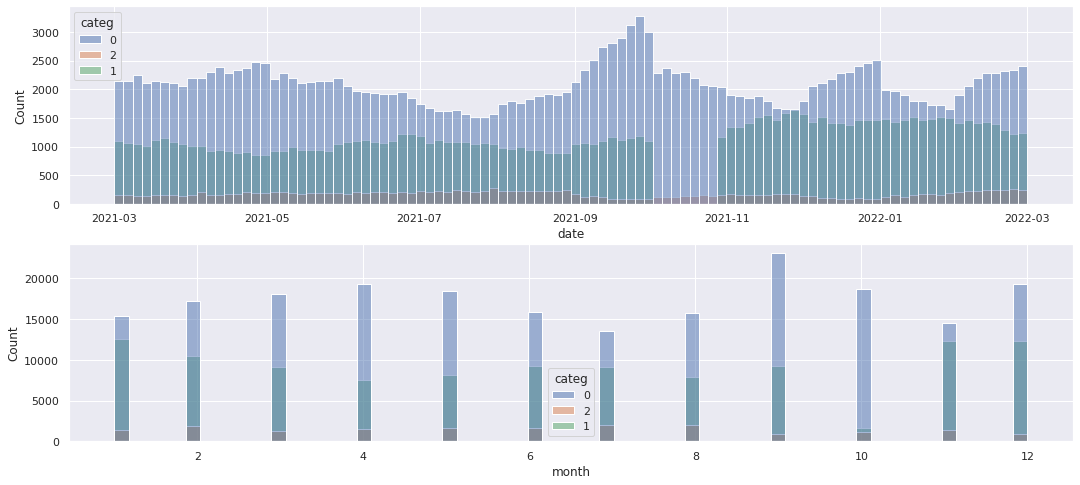

In [36]:
# missing values for categ 1
plt.subplot(2, 1, 1)
sns.histplot(data = df, x = 'date', hue = 'categ', bins = 100);

plt.subplot(2, 1, 2)
sns.histplot(data = df, x = 'month', hue = 'categ');

In [33]:
# Missing values in category '1' during October
df[(df['month'] == 10) & (df['categ'] == '1')]['day'].unique()

array([ 1, 28, 30, 31, 29])

Lack of information regarding "category 1" products between **the 2nd and the 27th of October**.

## 1.4. Bivariate Analysis 

In [37]:
df.head()

,id_prod,price,categ,date,client_id,sex,birth,age,year,month,day,hour,period_of_day
0,0_1483,4.99,0,2021-04-10 18:37:28.723910,c_4450,f,1977,43,2021,4,10,18,night
1,2_226,65.75,2,2022-02-03 01:55:53.276402,c_277,f,2000,20,2022,2,3,1,morning_dawn
2,1_374,10.71,1,2021-09-23 15:13:46.938559,c_4270,f,1979,41,2021,9,23,15,afternoon
3,0_2186,4.20,0,2021-10-17 03:27:18.783634,c_4597,m,1963,57,2021,10,17,3,morning_dawn
4,0_1351,8.99,0,2021-07-17 20:34:25.800563,c_1242,f,1980,40,2021,7,17,20,night


### 1.4.1. Total Sales

**Through months**

**Through days of month**

**Through period of day**

**According to sex**

**According to age**

### 1.4.2. Products

**Most sold products**

# 2. ANSWERING QUESTIONS

## 2.1. Is there a correlation between the gender of the customers and the categories of products purchased?

In [38]:
df.head()

,id_prod,price,categ,date,client_id,sex,birth,age,year,month,day,hour,period_of_day
0,0_1483,4.99,0,2021-04-10 18:37:28.723910,c_4450,f,1977,43,2021,4,10,18,night
1,2_226,65.75,2,2022-02-03 01:55:53.276402,c_277,f,2000,20,2022,2,3,1,morning_dawn
2,1_374,10.71,1,2021-09-23 15:13:46.938559,c_4270,f,1979,41,2021,9,23,15,afternoon
3,0_2186,4.20,0,2021-10-17 03:27:18.783634,c_4597,m,1963,57,2021,10,17,3,morning_dawn
4,0_1351,8.99,0,2021-07-17 20:34:25.800563,c_1242,f,1980,40,2021,7,17,20,night


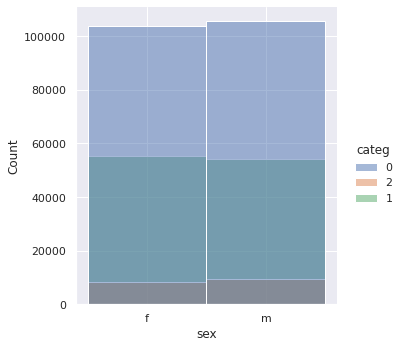

In [40]:
sns.displot(data = df, x = 'sex', hue = 'categ');

**Chi²**

In [ ]:
# r² / eta² / xi_n

aaaa

## 2.2.  Is there a correlation between the age of clients and...

**2.2.1. The total amount of purchases?**

**2.2.2. The frequency of purchase (ie. Number of purchases per month for example)?**

**2.2.3. The size of the average basket (in number of items)?**

**2.2.4. The categories of products purchased?**